In [47]:
import pandas as pd

df = pd.read_csv("/content/NYC_Shooting Data.csv")


# **Data Exploration and Cleaning**

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   incident_key             1000 non-null   int64 
 1   occur_date               1000 non-null   object
 2   occur_time               1000 non-null   object
 3   boro                     1000 non-null   object
 4   loc_of_occur_desc        1000 non-null   object
 5   precinct                 1000 non-null   int64 
 6   jurisdiction_code        1000 non-null   int64 
 7   loc_classfctn_desc       1000 non-null   object
 8   statistical_murder_flag  1000 non-null   bool  
 9   perp_age_group           1000 non-null   object
 10  perp_sex                 1000 non-null   object
 11  perp_race                1000 non-null   object
 12  vic_age_group            1000 non-null   object
 13  vic_sex                  1000 non-null   object
 14  vic_race                 1000 non-null   

In [49]:
df.head()

,incident_key,occur_date,occur_time,boro,loc_of_occur_desc,precinct,jurisdiction_code,loc_classfctn_desc,statistical_murder_flag,perp_age_group,perp_sex,perp_race,vic_age_group,vic_sex,vic_race
0,279683077,2023-12-29T00:00:00.000,03:43:00,QUEENS,INSIDE,113,0,COMMERCIAL,False,(null),(null),(null),25-44,M,BLACK
1,279709792,2023-12-29T00:00:00.000,21:22:00,BROOKLYN,OUTSIDE,75,0,STREET,False,25-44,M,BLACK,25-44,M,BLACK
2,279758069,2023-12-29T00:00:00.000,18:40:00,BRONX,OUTSIDE,40,0,STREET,False,(null),(null),(null),65+,M,BLACK HISPANIC
3,279609499,2023-12-27T00:00:00.000,19:47:00,BRONX,OUTSIDE,42,0,STREET,False,(null),(null),(null),<18,M,BLACK HISPANIC
4,279547332,2023-12-26T00:00:00.000,23:31:00,BRONX,OUTSIDE,46,0,STREET,False,45-64,M,WHITE HISPANIC,45-64,M,WHITE


In [50]:
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")


Number of duplicate rows: 0


In [51]:
print("\nSummary Statistics for Numeric Columns:")
print(df.describe())


Summary Statistics for Numeric Columns:
       incident_key     precinct  jurisdiction_code
count  1.000000e+03  1000.000000        1000.000000
mean   2.721937e+08    62.920000           0.212000
std    3.961095e+06    27.966296           0.611089
min    2.653031e+08     5.000000           0.000000
25%    2.691220e+08    43.000000           0.000000
50%    2.718186e+08    56.000000           0.000000
75%    2.752351e+08    79.000000           0.000000
max    2.797581e+08   123.000000           2.000000


In [52]:
print("\nSummary Statistics for Categorical Columns:")
print(df.describe(include=['object', 'bool']))

print("\nMissing Values per Column:")
print(df.isnull().sum())



Summary Statistics for Categorical Columns:
                     occur_date occur_time   boro loc_of_occur_desc  \
count                      1000       1000   1000              1000   
unique                      264        538      5                 2   
top     2023-07-05T00:00:00.000   02:40:00  BRONX           OUTSIDE   
freq                         19         11    354               832   

       loc_classfctn_desc statistical_murder_flag perp_age_group perp_sex  \
count                1000                    1000           1000     1000   
unique                 10                       2              6        3   
top                STREET                   False         (null)        M   
freq                  632                     803            409      574   

       perp_race vic_age_group vic_sex vic_race  
count       1000          1000    1000     1000  
unique         7             6       3        7  
top       (null)         25-44       M    BLACK  
freq         

In [53]:
df['occur_date'] = pd.to_datetime(df['occur_date'], errors='coerce')
df['occur_time'] = pd.to_datetime(df['occur_time'], format='%H:%M', errors='coerce').dt.time

print("\nData Types After Conversion:")
print(df.dtypes)

text_columns = ['boro', 'loc_of_occur_desc', 'loc_classfctn_desc', 'perp_race', 'vic_race']
df[text_columns] = df[text_columns].apply(lambda x: x.str.strip().str.title())

print("\nUnique values in 'boro' column before standardization:")
print(df['boro'].unique())

boro_mapping = {
    'Manhattan': 'Manhattan',
    'Brooklyn': 'Brooklyn',
    'Bronx': 'Bronx',
    'Queens': 'Queens',
    'Staten Island': 'Staten Island'
}

df['boro'] = df['boro'].map(boro_mapping)
print("\nUnique values in 'boro' column after standardization:")
print(df['boro'].unique())

if duplicates > 0:
    df = df.drop_duplicates()
    print(f"\nRemoved {duplicates} duplicate rows.")

print("\nPrecinct Column Analysis:")
print(df['precinct'].describe())
print("Unique precincts:", sorted(df['precinct'].unique()))


df = df[df['precinct'].between(1, 123)]

print("\nCleaned Dataset Info:")
print(df.info())
print("\nCleaned Data Sample:")
print(df.head())


Data Types After Conversion:
incident_key                        int64
occur_date                 datetime64[ns]
occur_time                 datetime64[ns]
boro                               object
loc_of_occur_desc                  object
precinct                            int64
jurisdiction_code                   int64
loc_classfctn_desc                 object
statistical_murder_flag              bool
perp_age_group                     object
perp_sex                           object
perp_race                          object
vic_age_group                      object
vic_sex                            object
vic_race                           object
dtype: object

Unique values in 'boro' column before standardization:
['Queens' 'Brooklyn' 'Bronx' 'Manhattan' 'Staten Island']

Unique values in 'boro' column after standardization:
['Queens' 'Brooklyn' 'Bronx' 'Manhattan' 'Staten Island']

Precinct Column Analysis:
count    1000.000000
mean       62.920000
std        27.966296
min      

# **Data Analysis**

In [54]:
boro_counts = df['boro'].value_counts()
print("\nIncident Count by Borough:")
print(boro_counts)


Incident Count by Borough:
boro
Bronx            354
Brooklyn         332
Manhattan        146
Queens           140
Staten Island     28
Name: count, dtype: int64


Summarizes the number of incidents that occurred in each NYC borough, showing where incidents are most concentrated.

In [55]:
location_counts = df['loc_classfctn_desc'].value_counts().head(10)
print("\nMost Common Crime Locations:")
print(location_counts)


Most Common Crime Locations:
loc_classfctn_desc
Street         632
Housing        144
Commercial      89
Dwelling        87
Other           17
Playground      11
Parking Lot      8
Transit          7
Vehicle          4
(Null)           1
Name: count, dtype: int64


Lists the top 10 locations with the most frequent incidents, helping to identify high-risk areas.

In [56]:
daily_incidents = df.groupby(df['occur_date'].dt.date).size()
print("\nIncident Counts by Date (first 10 rows):")
print(daily_incidents.head(10))


Incident Counts by Date (first 10 rows):
occur_date
2023-03-18     5
2023-03-19    14
2023-03-20     5
2023-03-21     2
2023-03-22     2
2023-03-23     4
2023-03-24     3
2023-03-25     6
2023-03-26     1
2023-03-27     8
dtype: int64


Groups incidents by date, which is useful to understand how incident frequency changes over time. (Only first 10 dates are displayed for readability).



In [57]:
df['day_of_week'] = df['occur_date'].dt.day_name()
day_of_week_counts = df['day_of_week'].value_counts()
print("\nCrime Count by Day of the Week:")
print(day_of_week_counts)


Crime Count by Day of the Week:
day_of_week
Saturday     182
Sunday       181
Monday       152
Friday       134
Tuesday      124
Thursday     115
Wednesday    112
Name: count, dtype: int64


Breaks down incidents by the day of the week to see if certain days have higher crime rates.

In [58]:
perp_age_group_counts = df['perp_age_group'].value_counts()
vic_age_group_counts = df['vic_age_group'].value_counts()

print("\nPerpetrator Age Group Counts:")
print(perp_age_group_counts)

print("\nVictim Age Group Counts:")
print(vic_age_group_counts)



Perpetrator Age Group Counts:
perp_age_group
(null)    409
25-44     276
18-24     176
45-64      67
<18        67
65+         5
Name: count, dtype: int64

Victim Age Group Counts:
vic_age_group
25-44      555
18-24      239
45-64       95
<18         86
65+         22
UNKNOWN      3
Name: count, dtype: int64


Counts incidents by perpetrator and victim age groups to see which age groups are most commonly involved.

In [59]:
perp_sex_counts = df['perp_sex'].value_counts()
vic_sex_counts = df['vic_sex'].value_counts()

print("\nPerpetrator Sex Counts:")
print(perp_sex_counts)

print("\nVictim Sex Counts:")
print(vic_sex_counts)


Perpetrator Sex Counts:
perp_sex
M         574
(null)    409
F          17
Name: count, dtype: int64

Victim Sex Counts:
vic_sex
M    882
F    117
U      1
Name: count, dtype: int64


Summarizes incidents by the gender of perpetrators and victims to understand gender-based involvement.

In [60]:
perp_race_counts = df['perp_race'].value_counts()
vic_race_counts = df['vic_race'].value_counts()

print("\nPerpetrator Race Counts:")
print(perp_race_counts)

print("\nVictim Race Counts:")
print(vic_race_counts)


Perpetrator Race Counts:
perp_race
(Null)                      409
Black                       374
White Hispanic              127
Black Hispanic               63
Asian / Pacific Islander     15
White                        11
Unknown                       1
Name: count, dtype: int64

Victim Race Counts:
vic_race
Black                             624
White Hispanic                    194
Black Hispanic                    129
White                              24
Asian / Pacific Islander           24
Unknown                             4
American Indian/Alaskan Native      1
Name: count, dtype: int64


Provides counts of perpetrators and victims by race, which is useful for demographic insights.

In [61]:
murder_flag_counts = df['statistical_murder_flag'].value_counts()
print("\nStatistical Murder Flag Counts:")
print(murder_flag_counts)


Statistical Murder Flag Counts:
statistical_murder_flag
False    803
True     197
Name: count, dtype: int64


Shows the counts for incidents classified as murder, giving an overview of this serious crime type.

In [62]:
precinct_counts = df['precinct'].value_counts().head(10)  # Top 10 precincts with highest crime
print("\nTop 10 Precincts with Highest Crime Counts:")
print(precinct_counts)


Top 10 Precincts with Highest Crime Counts:
precinct
46    63
75    56
47    48
44    45
73    41
40    37
43    33
48    32
79    32
42    31
Name: count, dtype: int64


Lists the top 10 precincts with the highest crime counts, which can be used to identify precincts with higher crime rates.

# **Data Visualization**

<ipython-input-63-799bbe7a8d82>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='boro', palette='viridis')


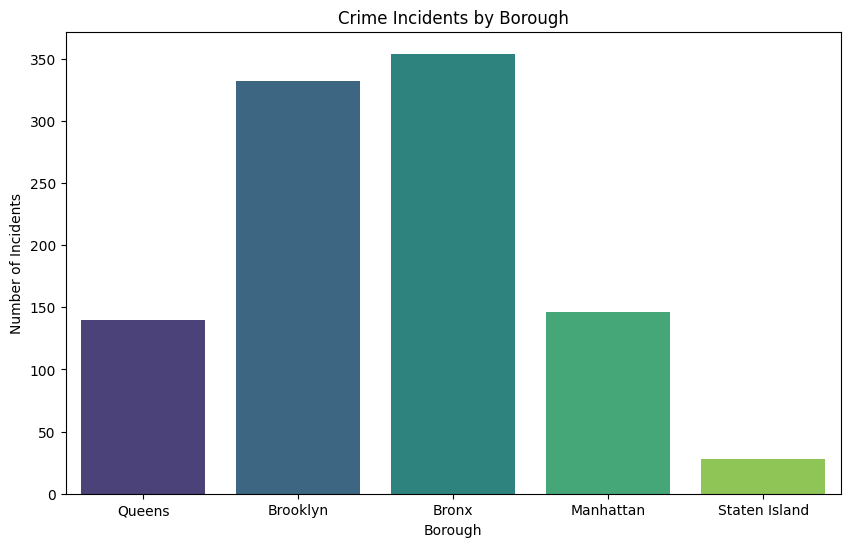

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='boro', palette='viridis')
plt.title('Crime Incidents by Borough')
plt.xlabel('Borough')
plt.ylabel('Number of Incidents')
plt.show()

This bar chart helps identify which boroughs have higher crime rates, allowing a geographical assessment of crime across NYC. This is useful for resource allocation and understanding where law enforcement may need to focus efforts.

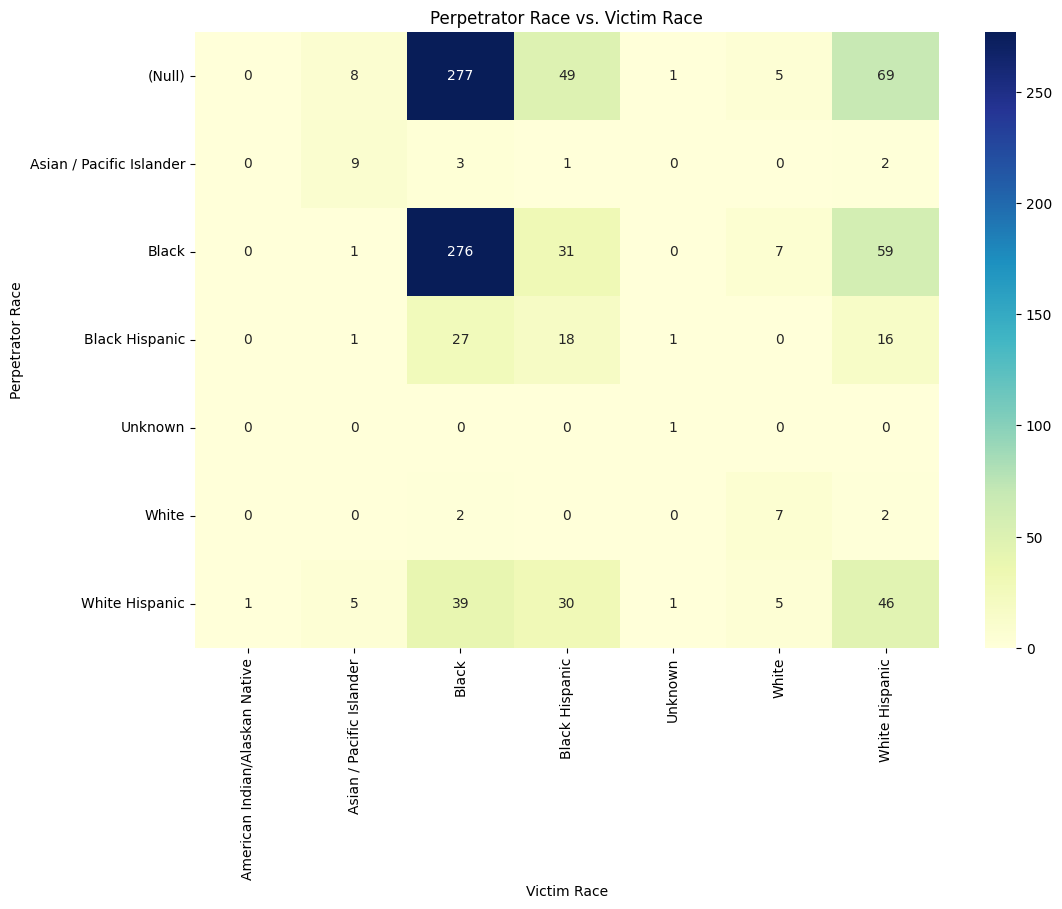

In [64]:
# Count incidents by perpetrator and victim race
race_counts = pd.crosstab(df['perp_race'], df['vic_race'])

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(race_counts, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Perpetrator Race vs. Victim Race')
plt.xlabel('Victim Race')
plt.ylabel('Perpetrator Race')
plt.show()


the "Perpetrator Race vs. Victim Race" heatmap serves as a powerful tool for visualizing and analyzing crime data, allowing stakeholders to make informed decisions and understand the complex social dynamics at play. The insights gained from this analysis can help inform community programs, enhance law enforcement strategies, and ultimately contribute to more effective public safety measures.

<ipython-input-65-00a081f5c9c9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='perp_age_group', palette='viridis', order=df['perp_age_group'].value_counts().index)


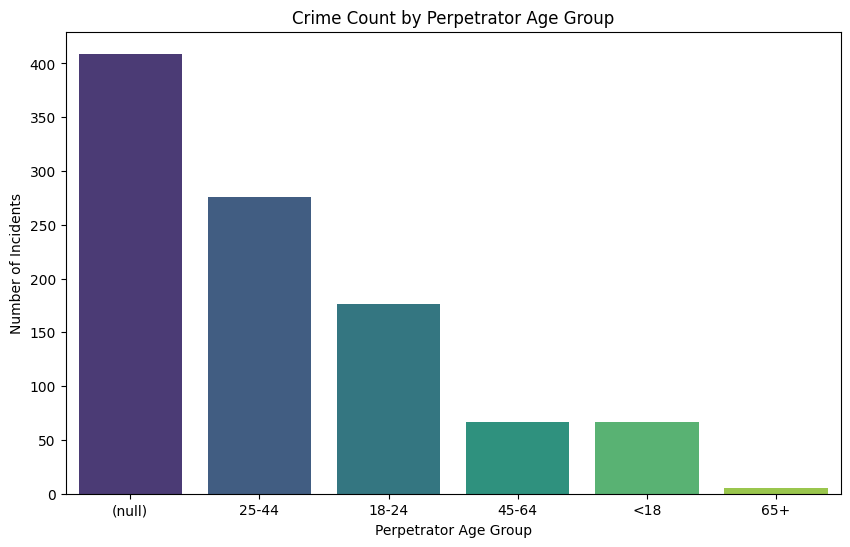

In [65]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='perp_age_group', palette='viridis', order=df['perp_age_group'].value_counts().index)
plt.title('Crime Count by Perpetrator Age Group')
plt.xlabel('Perpetrator Age Group')
plt.ylabel('Number of Incidents')
plt.show()

This visualization reveals which age groups are more frequently involved in crime, providing demographic insights into crime trends. Such information can support targeted interventions, outreach programs, and preventive measures tailored to specific age groups.

# **SQL Queries:**

In [71]:
!pip install pandasql

In [74]:
import pandasql as ps

In [75]:
query1 = """
SELECT
    boro,
    COUNT(incident_key) AS total_incidents
FROM
    df
GROUP BY
    boro
ORDER BY
    total_incidents DESC;
"""
total_incidents_by_boro = ps.sqldf(query1)
print(total_incidents_by_boro)

            boro  total_incidents
0          Bronx              354
1       Brooklyn              332
2      Manhattan              146
3         Queens              140
4  Staten Island               28


Counts the total number of incidents per borough

In [78]:
query2 = """
SELECT
    strftime('%H', occur_time) AS occur_hour,
    COUNT(incident_key) AS incident_count
FROM
    df
GROUP BY
    occur_hour
ORDER BY
    occur_hour;
"""
incidents_by_hour = ps.sqldf(query3)
print(incidents_by_hour)

  occur_hour  incident_count
0       None            1000


Groups incidents by hour and counts them.

In [81]:
query4 = """
SELECT
    boro,
    COUNT(incident_key) AS murder_incidents
FROM
    df
WHERE
    statistical_murder_flag = TRUE
GROUP BY
    boro
ORDER BY
    murder_incidents DESC;
"""
murder_incidents_by_boro = ps.sqldf(query3)
print(murder_incidents_by_boro)

            boro  murder_incidents
0       Brooklyn                66
1          Bronx                65
2      Manhattan                32
3         Queens                27
4  Staten Island                 7


Counts the murder incidents in each borough

In [83]:
query5 = """
SELECT
    loc_of_occur_desc,
    COUNT(incident_key) AS total_incidents
FROM
    df
GROUP BY
    loc_of_occur_desc
ORDER BY
    total_incidents DESC
LIMIT 10;  -- Limiting to top 10 locations
"""
common_locations = ps.sqldf(query5)
print(common_locations)

  loc_of_occur_desc  total_incidents
0           Outside              832
1            Inside              168


This query identifies the top locations where incidents occurred and counts the number of incidents for each location.

In [85]:
query6 = """
SELECT
    strftime('%w', occur_date) AS day_of_week,  -- 0 = Sunday, 1 = Monday, ..., 6 = Saturday
    COUNT(incident_key) AS total_incidents
FROM
    df
GROUP BY
    day_of_week
ORDER BY
    day_of_week;
"""
crime_trends_by_day = ps.sqldf(query6)
print(crime_trends_by_day)

  day_of_week  total_incidents
0           0              181
1           1              152
2           2              124
3           3              112
4           4              115
5           5              134
6           6              182


This query extracts the day of the week from the occur_date, counts the number of incidents per day, and orders the results.

# **Challenges and Solutions**

Data Quality Issues: Inconsistent data in categorical fields (e.g., variations in boro names) can be challenging. Address this by standardizing values using mappings or regex functions.


Handling Temporal Data: Combining occur_date and occur_time effectively to perform time-based analysis might be challenging. Using pd.to_datetime and pd.to_timedelta functions in pandas can help overcome this.

# **Future Steps**

Predictive Modeling: Use machine learning models to predict high-risk times and locations based on historical data. This could assist in preemptively allocating resources for public safety.


Automation of Data Updates and Analysis: Implement an automated pipeline that regularly updates crime data, performs the analysis, and generates reports or alerts for new patterns, making the process more efficient for regular monitoring.